In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


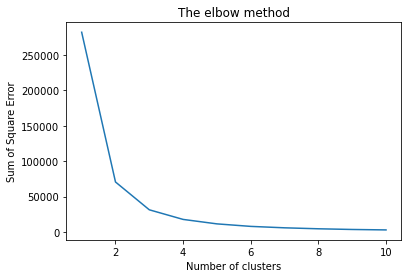

In [3]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2,3]].values

from sklearn.cluster import KMeans
sse = []
k_range = range(1,11)
for i in k_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(k_range, sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Error') # Within cluster sum of squares
plt.show()

 The optimum number of clusters is 3

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [5]:
kmeans = KMeans(n_clusters = 3,
                random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
df['cluster'] = y_kmeans
df.tail(59)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,2
92,93,5.8,2.6,4.0,1.2,Iris-versicolor,2
93,94,5.0,2.3,3.3,1.0,Iris-versicolor,2
94,95,5.6,2.7,4.2,1.3,Iris-versicolor,2
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,2
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,2
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,2
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,2
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,1


In [7]:
df.cluster.unique()

array([0, 2, 1])

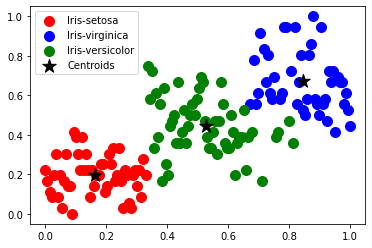

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-versicolor')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200.5, c = 'black', label = 'Centroids', marker='*')

plt.legend()